In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.utils import shuffle

# a.	Carregamento do conjunto de dados

In [103]:
filePath = 'wine.data' #getting data path

data = pd.read_csv(filePath, names=["label", 
        "Alcohol", "Malic acid", "Ash", 
	    "Alcalinity of ash", "Magnesium",
	    "Total phenols", "Flavanoids",
 	    "Nonflavanoid phenols", "Proanthocyanins",
	    "Color intensity", "Hue", "OD280/OD315 of diluted wines",
 	    "Proline"]) #reading data from pandas
print(data.head(), data.shape)

   label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

# b.	Mistura do conjunto de dados

In [104]:
data = shuffle(data) #shuffling data
print(data.head(), data.shape)

     label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
58       1    13.72        1.43  2.50               16.7        108   
102      2    12.34        2.45  2.46               21.0         98   
21       1    12.93        3.80  2.65               18.6        102   
92       2    12.69        1.53  2.26               20.7         80   
59       2    12.37        0.94  1.36               10.6         88   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
58            3.40        3.67                  0.19             2.04   
102           2.56        2.11                  0.34             1.31   
21            2.41        2.41                  0.25             1.98   
92            1.38        1.46                  0.58             1.62   
59            1.98        0.57                  0.28             0.42   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
58              6.80  0.89                          2.87     1285 

In [105]:
features = data.drop(['label'], axis=1) #getting the training features
labels = data['label'] #getting the training labels
print(labels.head(), features.head())

58     1
102    2
21     1
92     2
59     2
Name: label, dtype: int64      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
58     13.72        1.43  2.50               16.7        108           3.40   
102    12.34        2.45  2.46               21.0         98           2.56   
21     12.93        3.80  2.65               18.6        102           2.41   
92     12.69        1.53  2.26               20.7         80           1.38   
59     12.37        0.94  1.36               10.6         88           1.98   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
58         3.67                  0.19             2.04             6.80  0.89   
102        2.11                  0.34             1.31             2.80  0.80   
21         2.41                  0.25             1.98             4.50  1.03   
92         1.46                  0.58             1.62             3.05  0.96   
59         0.57                  0.28            

In [106]:
encoder = LabelEncoder() #instantiate encoder class to encode labels
lEncoded = encoder.fit_transform(labels) #fitting and transforming data
labelsE = pd.get_dummies(lEncoded).values #encoding labels
print(labelsE[:5], features.head())

[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]      Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
58     13.72        1.43  2.50               16.7        108           3.40   
102    12.34        2.45  2.46               21.0         98           2.56   
21     12.93        3.80  2.65               18.6        102           2.41   
92     12.69        1.53  2.26               20.7         80           1.38   
59     12.37        0.94  1.36               10.6         88           1.98   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
58         3.67                  0.19             2.04             6.80  0.89   
102        2.11                  0.34             1.31             2.80  0.80   
21         2.41                  0.25             1.98             4.50  1.03   
92         1.46                  0.58             1.62             3.05  0.96   
59         0.57                  0.28             0.42             1.95  1

# c.	Normalização das caraterísticas usando zscore

In [108]:
features = features.select_dtypes(include='number').apply(zscore) #normalizing features
print(features.head())

      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
58   0.888627   -0.813595  0.487926          -0.839280   0.579852   
102 -0.816038    0.102021  0.341713           0.451946  -0.122282   
21  -0.087232    1.313866  1.036228          -0.268738   0.158572   
92  -0.383696   -0.723829 -0.389355           0.361860  -1.386122   
59  -0.778980   -1.253450 -3.679162          -2.671018  -0.824415   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
58        1.770396    1.647239             -1.384766         0.786863   
102       0.424438    0.081051             -0.176095        -0.492158   
21        0.184088    0.382241             -0.901297         0.681738   
92       -1.466313   -0.571528              1.757779         0.050988   
59       -0.504914   -1.465058             -0.659563        -2.051513   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
58          0.753498 -0.295924                      0.364855  1.713598  


# d.	Divisão do conjunto de dados

In [109]:
fd = int(.6*len(data)) #Getting first split index point of division 
sd = fd+int(.2*len(data)) #Getting second split index point of division

trainF, validationF, testF = np.split(features, [fd, sd]) #split data in train, test and validation sets
trainLE, validationLE, testLE = np.split(labelsE, [fd, sd]) #split data in train, test and validation sets
print(trainF.shape, validationF.shape, testF.shape)
print(trainLE.shape, validationLE.shape, testLE.shape)
#print(validationLE[:5])

(106, 13) (35, 13) (37, 13)
(106, 3) (35, 3) (37, 3)


# e.	Definição da rede:

In [110]:
model = Sequential() #instantiate the Sequential module to create the model ones zeros
#model.add(Dense(13, kernel_initializer='zeros', input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(13, kernel_initializer='ones', input_shape=(13,), activation='relu')) #adding an input layer of 4 perceptrons and as a activation function relu
model.add(Dense(3, activation='softmax')) #adding the output layer
model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy']) #definning the learning rate
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 13)                182       
                                                                 
 dense_17 (Dense)            (None, 3)                 42        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\guazo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# f.	Treinamento

In [111]:
valSet = (validationF, validationLE)
history = model.fit(trainF, trainLE, epochs=100, validation_data=valSet, verbose=0) #training the model

# g.	Predição

In [112]:
labelPred = model.predict(testF) #Getting the predictions
print(labelPred[:10])

[[6.8435934e-04 9.9908292e-01 2.3274253e-04]
 [1.1708677e-07 1.3249178e-06 9.9999857e-01]
 [9.9998677e-01 1.2292089e-05 9.3222599e-07]
 [1.1057234e-05 9.9997735e-01 1.1556406e-05]
 [4.1951225e-03 2.9111675e-03 9.9289364e-01]
 [9.9992728e-01 7.2633389e-05 1.3702444e-07]
 [1.1949497e-03 9.9825078e-01 5.5413513e-04]
 [3.8039873e-04 9.9946266e-01 1.5690619e-04]
 [6.6486646e-05 9.9991786e-01 1.5648357e-05]
 [1.0000000e+00 1.2366172e-11 1.1535768e-09]]


# h.	Obtenção dos resultados

In [113]:
labelTestClass = np.argmax(testLE, axis=1) #getting test labels max values to ensure the report and confusion matrix
labelPredClass = np.argmax(labelPred, axis=1) #getting test labels predictions max values to ensure the report and confusion matrix
print(labelTestClass)

[1 2 0 1 2 0 1 1 1 0 2 2 0 2 0 2 0 0 2 2 0 1 2 1 2 0 2 1 0 1 0 1 2 1 1 2 0]


In [114]:
report = classification_report(labelTestClass, labelPredClass) #getting the report
confMatrix = confusion_matrix(labelTestClass, labelPredClass) #getting the confusion matrix
print(report)
print(confMatrix)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        13

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.98      0.97      0.97        37

[[11  1  0]
 [ 0 12  0]
 [ 0  0 13]]


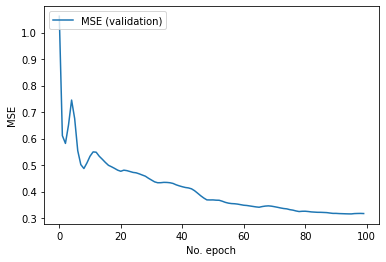

In [115]:
#Plotting the MSE
plt.plot(history.history['val_loss'], label='MSE (validation)')
plt.ylabel('MSE')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.savefig('test.jpg', dpi=300, bbox_inches='tight')
plt.show()